In [104]:
import pandas as pd, os, numpy as np, matplotlib.pyplot as plt

In [105]:
raw_data = pd.read_csv('premier_league_data_21_22.csv')

In [106]:
df =        raw_data[[
    
    'element_type', 'date', 'player_name', 'team_name', 'opponent_team_name', 'minutes', 'event', 'h_a',  #Identifiers

    'goals_scored','assists', 'clean_sheets','goals_conceded', 'own_goals', 'team_scored', 'team_conceded', 'yellow_cards','red_cards','penalties_missed','penalties_saved', 'saves','npg', 'wins', 'loses',    #Outcome metrics

    'ict_index', 'influence', 'creativity', 'bonus', 'threat','total_points',       #FPL metrics

    'shots', 'xG_player','xA', 'key_passes', 'xGChain', 'xGBuildup', 'npxGD', 'deep', 'deep_allowed', 'ppda_allowed_att', 'ppda_allowed_def', 'ppda_att', 'ppda_def' #Underlying metrics
    ]]

Benchmark model -> Use the rolling average of past values to predict the current value

Below we vary the size of the rolling average windows and analyse how this affects our prediction model

In [126]:
def rolling_benchmark_model(df,x):
    df.index.rename('entry',inplace=True)

    rolling_pts = df.groupby('player_name')['total_points'].rolling(x).mean().groupby('player_name').shift(1)
    rolling_pts.rename('rolling_total_points', inplace=True)

    indexed_df = df.reset_index().set_index(['player_name', 'entry'])
    benchmark_df = pd.merge(rolling_pts, indexed_df, how='inner', left_index=True, right_index=True).dropna()

    # Calculate SSE, SSR, SST, RSQ for model of rolling size window: x
    sse = sum((benchmark_df['total_points'] - benchmark_df['rolling_total_points']) ** 2)
    ssr = sum((benchmark_df['rolling_total_points'] - benchmark_df['total_points'].mean()) **2)
    sst = sse+ssr
    rsq = ssr/sst

    stderr = np.sqrt(sse / (len(benchmark_df) - 2))

    return sse,ssr,sst,rsq,stderr,benchmark_df


In [127]:
temp = [rolling_benchmark_model(df,i) for i in range(1,30)]
rol_window_std_errs = [i[4] for i in temp]
rol_window_sse = [i[0] for i in temp]
rol_window_ssr = [i[1] for i in temp]
rol_window_sst = [i[2] for i in temp]
rol_window_rsq = [i[3] for i in temp]


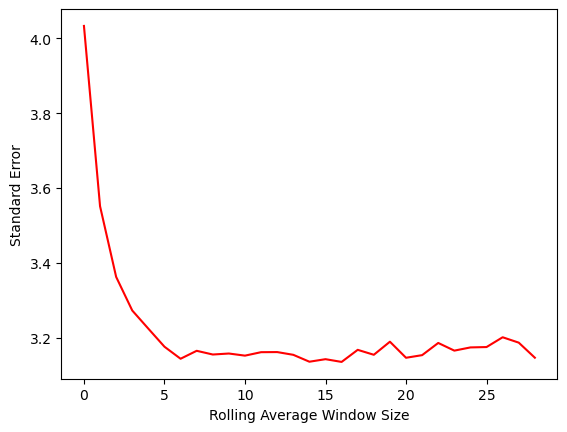

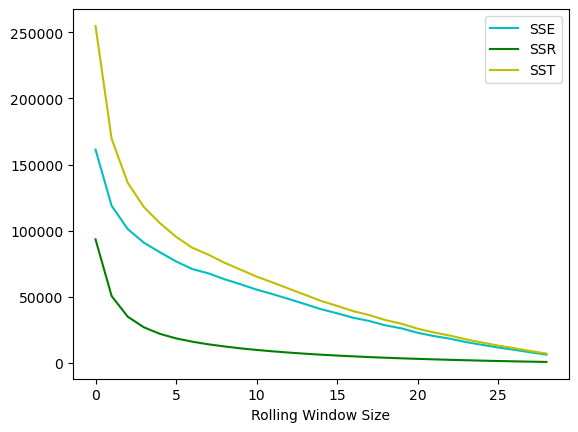

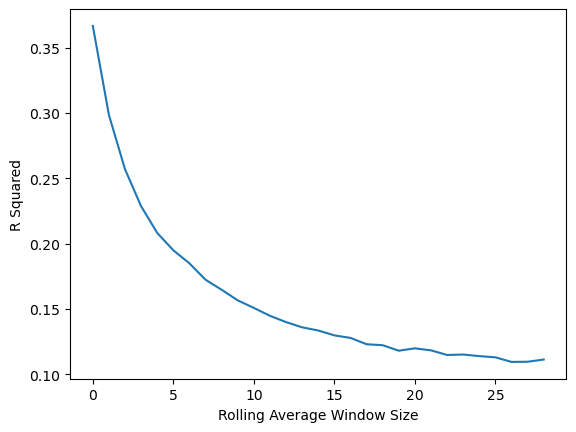

In [132]:
plt.figure(1)
plt.ylabel('Standard Error')
plt.xlabel('Rolling Average Window Size')
plt.plot(rol_window_std_errs,'r')

plt.figure(2)

# plt.subplot(311)
# plt.ylabel('SSE')
plt.plot(rol_window_sse,'c',label='SSE')

# plt.subplot(312)
# plt.ylabel('SSR')
plt.plot(rol_window_ssr,'g',label='SSR')

# plt.subplot(313)
# plt.ylabel('SST')
plt.xlabel('Rolling Window Size')
plt.plot(rol_window_sst,'y',label='SST')

plt.legend()

plt.figure(3)
plt.ylabel('R Squared')
plt.xlabel('Rolling Average Window Size')
plt.plot(rol_window_rsq)